/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

Best params: {'clf__C': 10, 'clf__penalty': 'l2'}
Best CV score: 0.9583333333333334

Test Accuracy: 0.9333333333333333

Classification report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



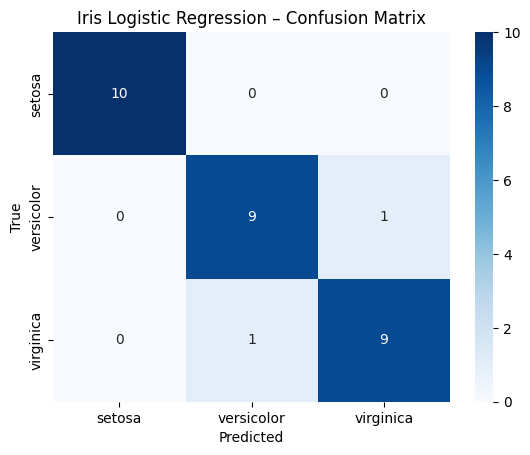

In [ ]:
# ทำการนำเข้าไลบรารีที่จำเป็นสำหรับการทำงาน
from sklearn.datasets import load_iris  # โหลดชุดข้อมูล Iris
from sklearn.model_selection import train_test_split, GridSearchCV  # แบ่งข้อมูลและค้นหาพารามิเตอร์ที่ดีที่สุด
from sklearn.preprocessing import StandardScaler  # ทำการปรับสเกลข้อมูลให้มีค่าเฉลี่ยเป็น 0 และส่วนเบี่ยงเบนมาตรฐานเป็น 1
from sklearn.pipeline import Pipeline  # สร้างลำดับขั้นตอนการประมวลผลข้อมูล
from sklearn.linear_model import LogisticRegression  # โมเดลการถดถอยโลจิสติก
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # เครื่องมือวัดประสิทธิภาพโมเดล
import seaborn as sns  # ใช้สำหรับสร้างกราฟความร้อน (heatmap)
import matplotlib.pyplot as plt  # ใช้สำหรับสร้างกราฟและแสดงผล

# 1. โหลดชุดข้อมูล Iris
iris = load_iris()  # โหลดชุดข้อมูล Iris ซึ่งมีข้อมูลดอกไม้ 3 สายพันธุ์
X, y = iris.data, iris.target  # X คือข้อมูลคุณลักษณะ (ความกว้าง/ความยาวกลีบและก้าน), y คือป้ายกำกับสายพันธุ์

# 2. แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)  # แบ่งข้อมูล 80% สำหรับฝึก 20% สำหรับทดสอบ โดยกำหนด random_state เพื่อให้ผลลัพธ์คงที่ และ stratify=y เพื่อให้สัดส่วนคลาสเท่ากันในทั้งสองชุด

# 3. สร้างไปป์ไลน์: การปรับสเกลข้อมูล → การถดถอยโลจิสติก
pipe = Pipeline([
    ("scaler", StandardScaler()),  # ขั้นแรก: ปรับสเกลข้อมูลให้มีการกระจายแบบปกติ
    ("clf", LogisticRegression(max_iter=1000, multi_class="ovr"))  # ขั้นที่สอง: สร้างโมเดลการถดถอยโลจิสติก กำหนด max_iter=1000 เพื่อให้การฝึกเสร็จสิ้น และใช้วิธีการ one-vs-rest (ovr) สำหรับปัญหาหลายคลาส
])

# 4. การปรับพารามิเตอร์ที่ดีที่สุด (ไม่บังคับแต่แนะนำ)
param_grid = {
    "clf__C": [0.01, 0.1, 1, 10, 100],  # ค่า C คือพารามิเตอร์การปรับค่าความแรงของการทำให้เป็นปกติ (regularization)
    "clf__penalty": ["l2"]  # ใช้การทำให้เป็นปกติแบบ l2 (Ridge) เนื่องจาก l1 ต้องการ solver พิเศษ
}  # กำหนดกริดของพารามิเตอร์ที่จะค้นหา
grid = GridSearchCV(pipe, param_grid, cv=5)  # สร้าง GridSearchCV โดยใช้ไปป์ไลน์ พารามิเตอร์กริด และการทำ cross-validation 5 ครั้ง
grid.fit(X_train, y_train)  # ฝึกโมเดลด้วยชุดข้อมูลฝึกเพื่อหาพารามิเตอร์ที่ดีที่สุด
print("Best params:", grid.best_params_)  # แสดงพารามิเตอร์ที่ดีที่สุดที่พบ
print("Best CV score:", grid.best_score_)  # แสดงคะแนนจากการ cross-validation ที่ดีที่สุด

# 5. ประเมินผลบนชุดข้อมูลทดสอบ
best_model = grid.best_estimator_  # ดึงโมเดลที่ดีที่สุดที่ได้จากการค้นหา
y_pred = best_model.predict(X_test)  # ทำนายผลบนชุดข้อมูลทดสอบ
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))  # คำนวณและแสดงความแม่นยำบนชุดทดสอบ
print("\nClassification report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))  # แสดงรายงานการจำแนกประเภท (precision, recall, f1-score) พร้อมชื่อคลาส

# 6. สร้างเมทริกซ์ความสับสน (Confusion Matrix)
cm = confusion_matrix(y_test, y_pred)  # คำนวณเมทริกซ์ความสับสนระหว่างค่าจริงและค่าทำนาย
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",  # สร้างกราฟความร้อนโดยใช้ seaborn
            xticklabels=iris.target_names,  # ตั้งชื่อแกน x เป็นชื่อสายพันธุ์ดอกไม้
            yticklabels=iris.target_names)  # ตั้งชื่อแกน y เป็นชื่อสายพันธุ์ดอกไม้
plt.xlabel("Predicted")  # ตั้งชื่อแกน x เป็น "Predicted" (ค่าทำนาย)
plt.ylabel("True")  # ตั้งชื่อแกน y เป็น "True" (ค่าจริง)
plt.title("Iris Logistic Regression – Confusion Matrix")  # ตั้งชื่อกราฟ
plt.show()  # แสดงกราฟ


Simple Logistic Regression Test Accuracy: 0.9666666666666667

Simple Logistic Regression Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



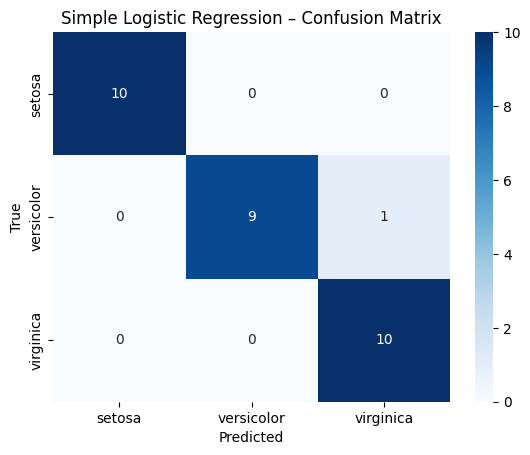

In [ ]:
# Simple Logistic Regression
from sklearn.linear_model import LogisticRegression

simple_lr = LogisticRegression(max_iter=1000)
simple_lr.fit(X_train, y_train)
y_pred_simple = simple_lr.predict(X_test)

print("\nSimple Logistic Regression Test Accuracy:", accuracy_score(y_test, y_pred_simple))
print("\nSimple Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_simple, target_names=iris.target_names))

# Confusion matrix for simple model
cm_simple = confusion_matrix(y_test, y_pred_simple)
sns.heatmap(cm_simple, annot=True, fmt="d", cmap="Blues",
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Simple Logistic Regression – Confusion Matrix")
plt.show()

In [ ]:
# Import necessary libraries
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Generate a random dataset for classification
X_rand, y_rand = make_classification(
    n_samples=200,  # Number of samples
    n_features=10,  # Number of features
    n_informative=5, # Number of informative features
    n_redundant=2,   # Number of redundant features
    n_classes=3,     # Number of classes
    random_state=42
)

# 2. Split the data into training and testing sets
X_train_rand, X_test_rand, y_train_rand, y_test_rand = train_test_split(
    X_rand, y_rand, test_size=0.3, random_state=42, stratify=y_rand
)

# 3. Create and train a simple logistic regression model
simple_lr_rand = LogisticRegression(max_iter=1000)
simple_lr_rand.fit(X_train_rand, y_train_rand)

# 4. Make predictions on the test set
y_pred_rand = simple_lr_rand.predict(X_test_rand)

# 5. Evaluate the model's performance
print("Random Dataset Test Accuracy:", accuracy_score(y_test_rand, y_pred_rand))
print("\nRandom Dataset Classification Report:\n", classification_report(y_test_rand, y_pred_rand))

# 6. Create and display the confusion matrix
cm_rand = confusion_matrix(y_test_rand, y_pred_rand)
sns.heatmap(cm_rand, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Simple Logistic Regression with Random Data – Confusion Matrix")
plt.show()